<a href="https://colab.research.google.com/github/somyacht/shared_notebooks/blob/master/tweet_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#!ls "/content/gdrive/My Drive"

In [ ]:
 # !curl -s https://course.fast.ai/setup/colab | bash

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.text import *

In [ ]:
#!cp 771A_lec1_slides.pdf "/content/gdrive/My Drive/"

In [ ]:
#!cp kaggle.json /content/gdrive/'My Drive'

In [ ]:
#!whereis kaggle


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp /content/gdrive/'My Drive'/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v


mkdir: cannot create directory ‘/root/.kaggle’: File exists
Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)
Processing /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01/kaggle-1.5.6-py3-none-any.whl
Kaggle API 1.5.6


In [ ]:
#! kaggle competitions list
!kaggle competitions download -c 'tweet-sentiment-extraction'

  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 184MB/s]


In [ ]:
!ls

gdrive	sample_data  tweet-sentiment-extraction.zip


In [ ]:
! mkdir train
! unzip tweet-sentiment-extraction.zip -d train

Archive:  tweet-sentiment-extraction.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
bs=48

In [ ]:
path = Path('/content/train')

In [ ]:
path.ls()

[PosixPath('/content/train/test.csv'),
 PosixPath('/content/train/sample_submission.csv'),
 PosixPath('/content/train/train.csv')]

In [ ]:
df1 = pd.read_csv(path/'train.csv')
df2 = pd.read_csv(path/'test.csv')
df1.head()
#df2.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df1=df1.drop(columns='selected_text')

In [ ]:
df1.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df = df.dropna()

In [ ]:
print(len(df),len(df1),len(df2))

31014 27481 3534


In [ ]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
data_lm = (TextList.from_df(df,cols=1)
           #Inputs: all the text files in path
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))


In [ ]:
data_lm.save(path/'data_lm.pkl')

In [ ]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [ ]:
data_lm.show_batch()

idx,text
0,"are fun when he is all smiles and xxunk xxbos xxmaj both of you xxbos xxmaj journey ! ? xxmaj wow ... u just became cooler . hehe ... ( is that possible ! ? ) xxbos as much as i love to be hopeful , i reckon the chances are xxunk = p i`m never gon na get my cake and stuff xxbos i really really like the song"
1,"! xxbos xxmaj got ta get creative with these mothers day gifts . xxmaj i`m gon na win them over with my love ! ! xxbos xxmaj thinks its gon na rain xxbos aah . well , have a few friends over there . xxmaj just wondering if xxunk great and weather`s been good ... xxbos xxmaj xxunk signing w / xxunk was fun , xxmaj i`m gna miss xxunk"
2,xxmaj march .. now just waiting for export and upload before i can share xxmaj still have 2 more xxunk to do ! xxbos lol yea i m thinkin bday bash ! but xxunk lame wants to sit in the house instead of xxunk wit me lol xxbos waiting for the battery to charge for my new xxup dslr xxbos xxmaj my dad had to xxunk ours six weeks ago
3,xxbos i also have to make space on my computer for the game . i don`t meet the minimum requirements for xxmaj sims 3 at the moment xxbos xxmaj i`ll keep that in mind if i decide to add an xxup la leg to my xxunk coast xxunk in xxmaj june xxbos @ the xxmaj san xxmaj xxunk xxmaj xxunk game xxunk . xxmaj not a huge crowd . xxmaj
4,"! xxbos thinking of getting new dvds , xxunk . can`t wait to get my laptop . xxbos is going to help xxunk cook xxbos heard through the xxunk that we might see you around today . xxmaj looking forward to meeting you . xxbos diggin ` your xxunk ! xxmaj looking good xxunk ! xxbos _ xxmaj i`m good thanks ! xxmaj did you have a good drive ?"


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-02
Min loss divided by 10: 3.63E-02


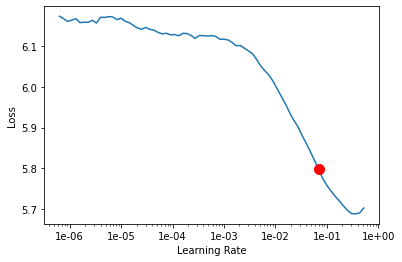

In [ ]:
learn.recorder.plot(suggestion = True,skip_end=15)

In [ ]:
learn.save(path/"lang_model_0")

In [ ]:
learn.load(path/"lang_model_0")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27913 items)
x: LMTextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3101 items)
x: LMTextList
xxbos xxup ahhh - xxmaj xxunk xxunk baby ? xxup hahaha i canï¿½t believe youu : o heh , actually i can . xxmaj life is worth taking xxunk ... http : / / tumblr.com / xxunk,xxbos ' xxmaj we did it we did it oh yea yea yea no eating here tonite woo eating here tonight no no no eating here tonite you on a diet ' finding xxunk,xxbos xxmaj about to clean my room,xxbos i think xxmaj i`ve got invisible glass xxunk in my hands cause my fingers keep having painful xxunk feelings,xxbos xxmaj of course , the xxmaj evil xxmaj day xxmaj job wants me t

In [ ]:
learn.fit_one_cycle(2, 6.92E-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.521394,4.561957,0.216567,00:26
1,4.201831,4.365242,0.229034,00:26


In [ ]:
learn.save(path/"lang_model_1")

In [ ]:
learn.load(path/"lang_model_0")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27913 items)
x: LMTextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3101 items)
x: LMTextList
xxbos xxup ahhh - xxmaj xxunk xxunk baby ? xxup hahaha i canï¿½t believe youu : o heh , actually i can . xxmaj life is worth taking xxunk ... http : / / tumblr.com / xxunk,xxbos ' xxmaj we did it we did it oh yea yea yea no eating here tonite woo eating here tonight no no no eating here tonite you on a diet ' finding xxunk,xxbos xxmaj about to clean my room,xxbos i think xxmaj i`ve got invisible glass xxunk in my hands cause my fingers keep having painful xxunk feelings,xxbos xxmaj of course , the xxmaj evil xxmaj day xxmaj job wants me t

In [ ]:
learn.fit_one_cycle(4, 6.92E-02 , moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.350302,4.598170,0.208780,00:26
1,4.547084,4.554599,0.218436,00:26
2,4.235583,4.416573,0.224884,00:26
3,3.862942,4.383136,0.229911,00:26


In [ ]:
learn.save(path/'lang_model_2_with_4ep')

In [ ]:
learn.load(path/'lang_model_0')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27913 items)
x: LMTextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3101 items)
x: LMTextList
xxbos xxup ahhh - xxmaj xxunk xxunk baby ? xxup hahaha i canï¿½t believe youu : o heh , actually i can . xxmaj life is worth taking xxunk ... http : / / tumblr.com / xxunk,xxbos ' xxmaj we did it we did it oh yea yea yea no eating here tonite woo eating here tonight no no no eating here tonite you on a diet ' finding xxunk,xxbos xxmaj about to clean my room,xxbos i think xxmaj i`ve got invisible glass xxunk in my hands cause my fingers keep having painful xxunk feelings,xxbos xxmaj of course , the xxmaj evil xxmaj day xxmaj job wants me t

In [ ]:
learn.fit_one_cycle(6, 6.92E-02 , moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.181078,4.476163,0.218287,00:26
1,4.541738,4.608839,0.210417,00:26
2,4.487964,4.553594,0.217328,00:26
3,4.248071,4.474546,0.224256,00:26
4,3.946744,4.413021,0.230390,00:26
5,3.708214,4.414439,0.230241,00:26


In [ ]:
learn.save(path/'lang_model_2_with_6ep')

In [ ]:
learn.load(path/'lang_model_2_with_6ep')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27913 items)
x: LMTextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3101 items)
x: LMTextList
xxbos xxup ahhh - xxmaj xxunk xxunk baby ? xxup hahaha i canï¿½t believe youu : o heh , actually i can . xxmaj life is worth taking xxunk ... http : / / tumblr.com / xxunk,xxbos ' xxmaj we did it we did it oh yea yea yea no eating here tonite woo eating here tonight no no no eating here tonite you on a diet ' finding xxunk,xxbos xxmaj about to clean my room,xxbos i think xxmaj i`ve got invisible glass xxunk in my hands cause my fingers keep having painful xxunk feelings,xxbos xxmaj of course , the xxmaj evil xxmaj day xxmaj job wants me t

In [ ]:
#learn.save(path/'fit_head')
#learn.load(path/'fit_head');

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07
Min loss divided by 10: 2.51E-04


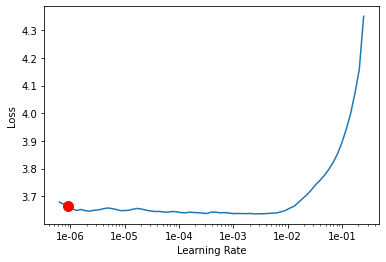

In [ ]:
learn.recorder.plot(suggestion = True,skip_end=15)

In [ ]:
learn.save(path/'full_lang_model_0')

In [ ]:
learn.load(path/'full_lang_model_0')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27913 items)
x: LMTextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3101 items)
x: LMTextList
xxbos xxup ahhh - xxmaj xxunk xxunk baby ? xxup hahaha i canï¿½t believe youu : o heh , actually i can . xxmaj life is worth taking xxunk ... http : / / tumblr.com / xxunk,xxbos ' xxmaj we did it we did it oh yea yea yea no eating here tonite woo eating here tonight no no no eating here tonite you on a diet ' finding xxunk,xxbos xxmaj about to clean my room,xxbos i think xxmaj i`ve got invisible glass xxunk in my hands cause my fingers keep having painful xxunk feelings,xxbos xxmaj of course , the xxmaj evil xxmaj day xxmaj job wants me t

In [ ]:
learn.fit_one_cycle(10, 2.51E-04, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.620225,4.416663,0.231597,00:33
1,3.580939,4.408227,0.234077,00:34
2,3.530114,4.403049,0.235863,00:34
3,3.447045,4.420111,0.237616,00:34
4,3.367786,4.438848,0.236524,00:34
5,3.281985,4.485007,0.236508,00:35
6,3.223558,4.505810,0.237798,00:34
7,3.165890,4.532830,0.237021,00:35
8,3.129730,4.545240,0.237120,00:35
9,3.119949,4.548225,0.236673,00:35


In [ ]:
learn.save(path/'full_lang_model_1')

In [ ]:
learn.load(path/'full_lang_model_0')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27913 items)
x: LMTextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3101 items)
x: LMTextList
xxbos xxup ahhh - xxmaj xxunk xxunk baby ? xxup hahaha i canï¿½t believe youu : o heh , actually i can . xxmaj life is worth taking xxunk ... http : / / tumblr.com / xxunk,xxbos ' xxmaj we did it we did it oh yea yea yea no eating here tonite woo eating here tonight no no no eating here tonite you on a diet ' finding xxunk,xxbos xxmaj about to clean my room,xxbos i think xxmaj i`ve got invisible glass xxunk in my hands cause my fingers keep having painful xxunk feelings,xxbos xxmaj of course , the xxmaj evil xxmaj day xxmaj job wants me t

In [ ]:
learn.fit_one_cycle(5, 8E-04, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.611492,4.399055,0.233829,00:34
1,3.539560,4.391067,0.237616,00:34
2,3.359654,4.444216,0.237731,00:35
3,3.135306,4.543962,0.235847,00:35
4,2.986105,4.613056,0.236243,00:35


In [ ]:
learn.save(path/'full_lang_model_2')

In [ ]:
learn.load(path/'full_lang_model_2')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (27913 items)
x: LMTextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3101 items)
x: LMTextList
xxbos xxup ahhh - xxmaj xxunk xxunk baby ? xxup hahaha i canï¿½t believe youu : o heh , actually i can . xxmaj life is worth taking xxunk ... http : / / tumblr.com / xxunk,xxbos ' xxmaj we did it we did it oh yea yea yea no eating here tonite woo eating here tonight no no no eating here tonite you on a diet ' finding xxunk,xxbos xxmaj about to clean my room,xxbos i think xxmaj i`ve got invisible glass xxunk in my hands cause my fingers keep having painful xxunk feelings,xxbos xxmaj of course , the xxmaj evil xxmaj day xxmaj job wants me t

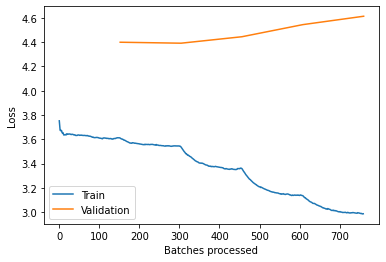

In [ ]:
learn.recorder.plot_losses()

In [ ]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because that non - Ripped it out ! xxbos Hangin with my mom and Jay Leno tonight ... Let`s see how long u go . xxbos i too NEED TO GO TO
I liked this movie because i loved it . You`re such a great guy . xxbos playing Wii fit in , playing the guitar hero metallica guitar is just not right ! xxbos _ UK You know i love you love


In [ ]:
learn.save_encoder(path/'full_lang_model_2_enc')

##Classifier

In [ ]:
data_clas = (TextList.from_df(df,vocab=data_lm.vocab,cols=1)
           #Inputs: all the text files in path
            .split_by_rand_pct(0.2)
           #We randomly split and keep 20% (10,000 reviews) for validation
            .label_from_df(cols=2)           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))

In [ ]:
data_clas.save(path/'data_clas.pkl')

In [ ]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [ ]:
data_clas.show_batch()

text,target
"xxbos i xxup tried xxup to xxup put a xxup iron xxup on , xxup on xxup my xxup book xxup bag xxup and i xxup burnt xxup my xxup bag xxup with xxup the xxup iron xxup lol .. xxup buzz xxup keep xxup making xxup fun xxup of xxup me ... ( xxrep 4 * ) xxup lol",positive
xxbos i xxmaj hate xxmaj it xxmaj there xxmaj should xxmaj be a xxmaj endless xxmaj supply xxmaj of xxmaj hot xxmaj water ! i xxmaj put the xxmaj water xxmaj heater xxmaj on 20mins xxmaj ago xxmaj so xxmaj ill xxmaj be xxmaj gone xxmaj in xxunk xxrep 4 *,negative
xxbos - xxup not a xxup heap xxup hey . xxup just xxup bout xxup tu xxup hit xxup the xxup sack . xxup its xxup xxunk xxup here . i xxup need xxup someone xxup tu xxup cuddle . xxup sucks xxup xxunk . ? x,negative
xxbos xxmaj it`s xxmaj midnight - xxmaj i`m outta here . xxup happy xxup mother`s xxup day xxup fellow xxup mommies ! ! ! ( xxmaj and to non - xxmaj mommies too ) . xxmaj may xxup everyone have a special day ! ! !,positive
xxbos xxup omj just xxunk xxup home from that party ! it`s 2 : xxup oo xxunk ! i`m xxup man tired ! xxunk xxup and xxup happy mother`s xxup day 2 xxup all ! ! ! take xxup care & xxup god bless !,neutral


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder(path/'full_lang_model_2_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.63E-03
Min loss divided by 10: 2.51E-02


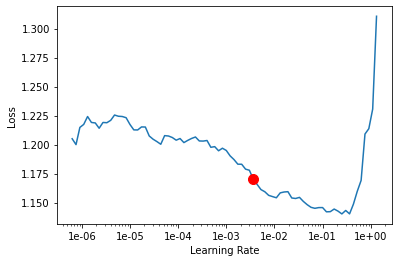

In [ ]:
learn.recorder.plot(suggestion = True)

In [ ]:
learn.save(path/'text_class_0')

In [ ]:
learn.load(path/'text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, 3.63E-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.871901,0.763521,0.670590,00:21
1,0.776751,0.682651,0.700742,00:19


In [ ]:
learn.save(path/'text_class_1')

In [ ]:
learn.load(path/'text_class_1');

In [ ]:
learn.freeze_to(-2)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-04
Min loss divided by 10: 6.31E-08


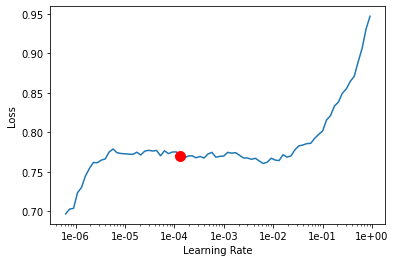

In [ ]:
learn.recorder.plot(suggestion = True)

In [ ]:
learn.save(path/'text_class_2')

In [ ]:
learn.load(path/'text_class_2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(1.32E-04/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.779568,0.680727,0.706224,00:19
1,0.753511,0.662234,0.720735,00:20


In [ ]:
learn.save(path/'text_class_2_1')

In [ ]:
learn.load(path/'text_class_2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(6.31E-08/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.794396,0.690362,0.706869,00:22
1,0.789389,0.670366,0.714125,00:19


In [ ]:
learn.save(path/'text_class_2_2')
learn.load(path/'text_class_2_1')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
# learn.save('second')
# learn.load('second');

In [ ]:
learn.freeze_to(-3)


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 9.12E-04


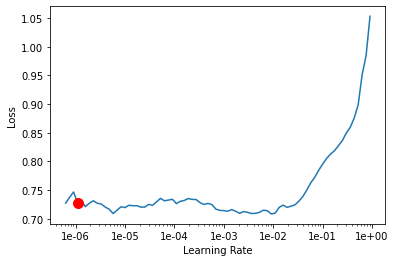

In [ ]:
learn.recorder.plot(suggestion = True)

In [ ]:
learn.save(path/'text_class_3_0')

In [ ]:
learn.load(path/'text_class_3_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(9.12E-04/(2.6**4),9.12E-04), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.714013,0.643943,0.731699,00:32
1,0.678044,0.639707,0.733473,00:33


In [ ]:
learn.save(path/'text_class_3_1')

In [ ]:
learn.load(path/'text_class_3_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(1.10E-06/(2.6**4),1.10E-06), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.733028,0.658316,0.724121,00:34
1,0.750465,0.658721,0.722348,00:34


In [ ]:
learn.save(path/'text_class_3_2')

In [ ]:
learn.load(path/'text_class_3_1')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
#learn.save('third')
#learn.load('third');

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 9.12E-08


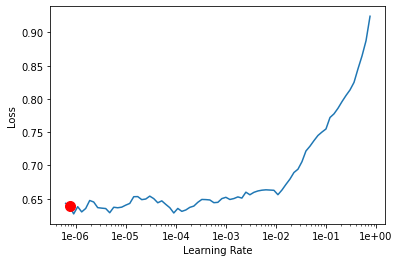

In [ ]:
learn.recorder.plot(suggestion = True)

In [ ]:
learn.save(path/'full_text_class_0')

In [ ]:
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(7.59E-07/(2.6**4),7.59E-07), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.687816,0.636500,0.733796,00:42
1,0.672202,0.639258,0.734279,00:45


In [ ]:
learn.save(path/'full_text_class_1')
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(1e-05/(2.6**4),1e-05), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.659776,0.637943,0.735247,00:41
1,0.679584,0.639355,0.734924,00:44


In [ ]:
learn.save(path/'full_text_class_2')
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(1e-04/(2.6**4),1e-04), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.662327,0.637221,0.733957,00:44
1,0.641745,0.636943,0.733634,00:47


In [ ]:
#learn.save(path/'full_text_class_3')
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(1e-03/(2.6**4),1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.670369,0.631694,0.737020,00:41
1,0.623836,0.629312,0.741535,00:43


In [ ]:
learn.save(path/'full_text_class_3')
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(3e-03/(2.6**4),3e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.675024,0.616719,0.749597,00:42
1,0.608929,0.605668,0.753789,00:43


In [ ]:
learn.save(path/'full_text_class_4')
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(2, slice(8e-03/(2.6**4),8e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.675148,0.607570,0.748146,00:45
1,0.578960,0.588948,0.760239,00:46


In [ ]:
learn.save(path/'full_text_class_5')
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(4, slice(1e-02/(2.6**4),1e-02), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.686080,0.697519,0.722348,00:43
1,0.628656,0.595016,0.761367,00:42
2,0.526241,0.585620,0.764431,00:45
3,0.378828,0.613595,0.760722,00:45


In [ ]:
learn.save(path/'full_text_class_6')
learn.load(path/'full_text_class_0')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24812 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos xxmaj sooo xxup sad i will miss you here in xxmaj san xxmaj diego ! ! !,xxbos my boss is xxunk me ...,xxbos what interview ! leave me alone,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj rangers forum on earth
y: CategoryList
neutral,negative,negative,negative,neutral
Path: .;

Valid: LabelList (6202 items)
x: TextList
xxbos xxmaj finally picked up some xxunk , but struggling to wrap my xxunk hand with the other ! xxmaj defo should have got some a lot sooner though,xxbos xxmaj stunning weather today / this afternoon / now - couldn`t ask for better !,xxbos g xxrep 6 o xxunk , i don`t want to be up i am xxup xxunk happy birthday again _ xxunk !,xxbos wow that`s quite a long time for studying xxmaj good luck with the job hunting though . xxmaj yes also a xxmaj mac user ( imac ) this side hehe,xxbos xxup today xxup was xxup soo xxup fun 

In [ ]:
learn.fit_one_cycle(3, slice(3e-03/(2.6**4),3e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.666682,0.620036,0.745405,00:42
1,0.590389,0.594917,0.758788,00:44
2,0.515882,0.606206,0.760561,00:41


In [ ]:
learn.predict("I really loved that movie, it was awesome!")